[link](https://docs.google.com/document/d/1h_1_UxUdzhkjzhMZCcibNOufkU9asa7cdWIZHOFeUMc/edit#heading=h.6qxxdaq5ec9c)


# Setup





In [1]:
# Imports para manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact



In [2]:
# Defininando a quantidade de casas decimais da visualização dos dados no Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema. 

## Desafio
Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

## Entregas

- Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!
- Responda também às seguintes perguntas:
- - Qual filme você recomendaria para uma pessoa que você não conhece?
- - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
- - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
- Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
- Supondo um filme com as seguintes características:

```
{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}
 ```

- Qual seria a nota do IMDB?

- Salve o modelo desenvolvido no formato .pkl. 

**A entrega deve ser feita através de um repositório de código público que contenha:**
- README explicando como instalar e executar o projeto
- Arquivo de requisitos com todos os pacotes utilizados e suas versões
- Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
- Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
- Arquivo .pkl conforme passo 5 acima.
- Todos os códigos produzidos devem seguir as boas práticas de codificação.



# Metodologia CRISP-DM

Este projeto será estruturado seguindo a metodologia CRISP-DM (Cross Industry Standard Process for Data Mining). 

## Fases da Metodologia CRISP-DM
![CRISP DM](Imagens/wi-crisp-en2.jpg)




1. **Entendimento do Negócio**
   - Compreender os objetivos e requisitos do projeto do ponto de vista do negócio.
   - Traduzir essas metas em uma definição do problema que possa ser abordada com dados.

2. **Entendimento dos Dados**
   - Coletar dados iniciais e familiarizar-se com eles.
   - Identificar problemas de qualidade dos dados e começar a encontrar insights iniciais.

3. **Preparação dos Dados**
   - Selecionar e limpar os dados relevantes para a análise.
   - Transformar e formatar os dados conforme necessário para as etapas subsequentes.

4. **Modelagem**
   - Selecionar e aplicar técnicas de modelagem apropriadas.
   - Calibrar parâmetros do modelo para otimizar o desempenho.

5. **Avaliação**
   - Avaliar os modelos para garantir que eles atendam aos objetivos do negócio.
   - Revisar todas as etapas anteriores e verificar se há alguma questão que ainda precisa ser abordada.

6. **Implementação**
   - Implementar o modelo em um ambiente de produção.
   - Documentar o processo e preparar um relatório final com os resultados e conclusões.

## Referência

Para mais informações sobre a metodologia CRISP-DM, consulte a documentação original:

- CRISP-DM 1.0: Step-by-step data mining guide. SPSS Inc. 
[Link para o documento](https://www.kde.cs.uni-kassel.de/wp-content/uploads/lehre/ws2012-13/kdd/files/CRISPWP-0800.pdf)



# 1 - Entendimento do Negócio

Inicialmente podemos definir um objetivo principal que é: **identificar qual tipo de filme a PProductions deve desenvolver a seguir para maximizar o retorno sobre o investimento.**

Para isso podemos classificar algumas metas intermediárias para se aprofundar no entendimento do negócio.
 
- Determinar os gêneros de filmes mais lucrativos.
- Analisar tendências de lançamento bem-sucedidas ao longo dos anos.
- Identificar fatores de sucesso (elenco, diretor, enredo).

Também é importante buscar métricas para quantificar.



# 2 - Entendimento dos Dados

###  Dicionário de dados.

A base de dados de treinamento contém 15 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

| Series_Title | Nome do filme                          |
|--------------|----------------------------------------|
| Released_Year| Ano de lançamento                      |
| Certificate  | Classificação etária                   |
| Runtime      | Tempo de duração                       |
| Genre        | Gênero                                 |
| IMDB_Rating  | Nota do IMDB                           |
| Overview     | Overview do filme                      |
| Meta_score   | Média ponderada de todas as críticas   |
| Director     | Diretor                                |
| Star1        | Ator/atriz #1                          |
| Star2        | Ator/atriz #2                          |
| Star3        | Ator/atriz #3                          |
| Star4        | Ator/atriz #4                          |
| No_of_Votes  | Número de votos                        |
| Gross        | Faturamento                            |



### Carreganto dos Dados

In [3]:
# Carregamento inicial dos dados
data_path = 'Data/desafio_indicium_imdb.csv'
df = pd.read_csv(data_path)\
       .drop('Unnamed: 0', axis = 1)

In [4]:
# Leitura das 5 primeiras linhas dos dados
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


* É possivel notar que na coluna `Genre` possui multiplos generos separados por vírgula.
* Os atores podem se repetir em colunas diferentes.
* A coluna `Runtime` referente ao tempo de filme necessita de correção para a remoção dos caracteres indesejados e transformação para um tipo de dado númerico.
* A coluna `Certificate` pode ser tratada como categorica.

In [5]:
# Exibindo um resumo do conjunto de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


* Nota-se a presença de dados ausentes nas colunas `Certificate`, `Meta_score` e `Gross`.
* As colunas `Released_Year` e `Gross` devem ser alteradas o tipo de dado.

### Dados ausentes

In [6]:
# Exibindo a quantidade de dados nulos por coluna.
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.00,842.00,999.00
mean,7.95,77.97,271621.42
std,0.27,12.38,320912.62
min,7.60,28.00,25088.00
25%,7.70,70.00,55471.50
50%,7.90,79.00,138356.00
75%,8.10,87.00,373167.50
max,9.20,100.00,2303232.00


Ao utilizar o método `describe()` é possivel verificar que a coluna `No_of_Votes` pode conter outliers, pois os valores máximos são discrepantes dos 75% destes dados.

Ao analisar a coluna correspondente ao ano de lançamento, é possivel notar que o conjunto de dados possui as informações referente aos filmes lançados do ano 1920 até 2020.


In [8]:
#  Exibindo os anos únicos ordenados de lançamentos dos filmes 
print(df['Released_Year'].sort_values().unique())

#  Exibindo a quantidade anos únicos de lançamentos dos filmes. 
print('\nQuantidade de anos diferentes: {}'.format(len(set(df['Released_Year']))))

['1920' '1921' '1922' '1924' '1925' '1926' '1927' '1928' '1930' '1931'
 '1932' '1933' '1934' '1935' '1936' '1937' '1938' '1939' '1940' '1941'
 '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949' '1950' '1951'
 '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960' '1961'
 '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971'
 '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981'
 '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991'
 '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001'
 '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' 'PG']

Quantidade de anos diferentes: 100


* Existe também um único valor incorreto preenchido com `PG`

In [9]:
df.query('Released_Year == "PG"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


* Ao consultar e pesquisar os dados, identifiquei que apenas o ano de lançamento do filme Apollo 13 estava incorreto. Embora essa anomalia seja uma sinalização referente à qualidade do conjunto de dados, a correção foi realizada conforme necessário.

In [10]:
# Visualizando os dados próximos ao filme Apollo 13
df.iloc[962:968]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
962,Die Hard: With a Vengeance,1995,A,128 min,"Action, Adventure, Thriller",7.60,John McClane and a Harlem store owner are targ...,58.00,John McTiernan,Bruce Willis,Jeremy Irons,Samuel L. Jackson,Graham Greene,364420,"100,012,499"
963,Dead Man,1995,R,121 min,"Adventure, Drama, Fantasy",7.60,"On the run after murdering a man, accountant W...",62.00,Jim Jarmusch,Johnny Depp,Gary Farmer,Crispin Glover,Lance Henriksen,90442,"1,037,847"
964,The Bridges of Madison County,1995,A,135 min,"Drama, Romance",7.60,Photographer Robert Kincaid wanders into the l...,69.00,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,73172,"71,516,617"
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.60,NASA must devise a strategy to return Apollo 1...,77.00,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"
966,Trois couleurs: Blanc,1994,U,92 min,"Comedy, Drama, Romance",7.60,"After his wife divorces him, a Polish immigran...",88.00,Krzysztof Kieslowski,Zbigniew Zamachowski,Julie Delpy,Janusz Gajos,Jerzy Stuhr,64390,"1,464,625"
967,Falling Down,1993,R,113 min,"Action, Crime, Drama",7.60,An ordinary man frustrated with the various fl...,56.00,Joel Schumacher,Michael Douglas,Robert Duvall,Barbara Hershey,Rachel Ticotin,171640,"40,903,593"


In [11]:
# Correção do ano de lançamento.
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995

# Transformação para tipo int
df['Released_Year'] = df['Released_Year'].astype(int)

Para auxiliar nas análises criarei uma coluna para segmentar o os filmes por período acumulado de 20

| Anos         | Released_year_tag |
|--------------|-------------------|
| 1920 - 1939  | 1 - Early Cinema  |
| 1940 - 1959  | 2 - Golden Era    |
| 1960 - 1979  | 3 - New Wave      |
| 1980 - 1999  | 4 - Modern Era    |
| 2000 - 2020  | 5 - Contemporary  |

In [57]:
def get_release_year_tag(year) -> str:
    '''
         A função atribui uma tag de ano de lançamento com base no ano fornecido.
    '''
    if 1920 <= year <= 1939:
        return "1 - Early Cinema"
    elif 1940 <= year <= 1959:
        return "2 - Golden Era"
    elif 1960 <= year <= 1979:
        return "3 - New Wave"
    elif 1980 <= year <= 1999:
        return "4 - Modern Era"
    elif 2000 <= year <= 2020:
        return "5 - Contemporary"
    else:
        return "6 - Out of Range"

In [60]:
df['Year_Tag'] = df['Released_Year'].apply(get_release_year_tag)

In [66]:
df.groupby('Year_Tag')[['Series_Title']].count()

,Series_Title
Year_Tag,
1 - Early Cinema,35
2 - Golden Era,91
3 - New Wave,149
4 - Modern Era,239
5 - Contemporary,485


Uma hipótese que vale ser analisada é se existe algum período de tempo em que há maior incidência de dados ausentes.

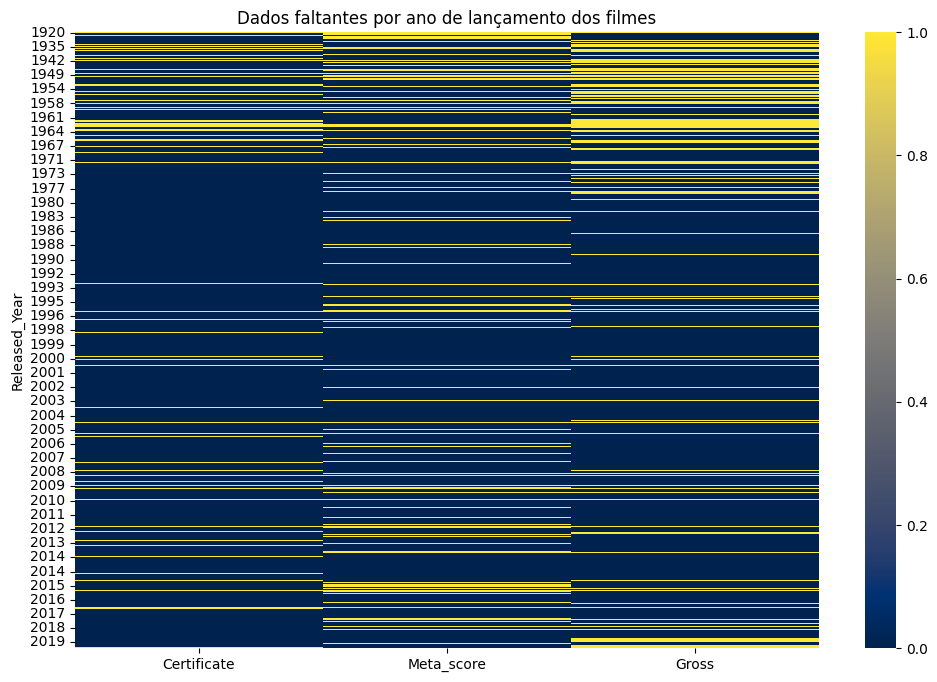

In [12]:
# Gráfico de calor de dados ausentes por ano de lançamento dos filmes
plt.figure(figsize=(12,8))
ax = sns.heatmap(df[['Released_Year','Certificate','Meta_score','Gross']].set_index('Released_Year').sort_values(by = 'Released_Year').isnull(), cmap='cividis')
ax.set_title('Dados faltantes por ano de lançamento dos filmes')
plt.show()

Criei a função `verifica_dados_ausentes_por_ano` para verificar a proporção da quantidade de dados ausentes.

In [13]:
def verifica_dados_ausentes_por_ano(df, ano) -> pd.DataFrame:
    '''
       A função verifica a quantidade e a proporção de dados faltantes até o ano especificado.
    '''

    # Para anos <= ano
    consulta_abaixo = df.query(f'Released_Year <= {ano}')
    tamanho_ano_abaixo = len(consulta_abaixo)
    dados_ausentes_abaixo = consulta_abaixo.isna().sum()
    dados_ausentes_abaixo = dados_ausentes_abaixo[dados_ausentes_abaixo > 0]
    proporcao_a_abaixo = (dados_ausentes_abaixo / tamanho_ano_abaixo) * 100
    
    # Para anos > ano
    consulta_acima = df.query(f'Released_Year > {ano}')
    tamanho_ano_acima = len(consulta_acima)
    dados_ausentes_acima = consulta_acima.isna().sum()
    dados_ausentes_acima = dados_ausentes_acima[dados_ausentes_acima > 0]
    proporcao_a_acima = (dados_ausentes_acima / tamanho_ano_acima) * 100

    # Concatenando os resultados em um DataFrame final
    df_output = pd.concat([dados_ausentes_abaixo, 
                           proporcao_a_abaixo, 
                           dados_ausentes_acima, 
                           proporcao_a_acima], axis=1, 
                           keys=[f'Qtd de Dados Faltantes Ano <= {ano}', 
                                 f'% Dados Faltantes Ano <= {ano}',
                                 f'Qtd de Dados Faltantes Ano > {ano}', 
                                 f'% Dados Faltantes Ano > {ano}']
                           )
    # Retornando o DataFrame estilizando com um mapa de calor por coluna. 
    return df_output.style.background_gradient(cmap="coolwarm")

- Após os anos 80 dimínui consideravelmente a quantidade de dados ausentes.

In [14]:
# Exibindo a quantiadade e proporção dos dados ausentes por ano menor e maior que 1980.
verifica_dados_ausentes_por_ano(df, 1980)

,Qtd de Dados Faltantes Ano <= 1980,% Dados Faltantes Ano <= 1980,Qtd de Dados Faltantes Ano > 1980,% Dados Faltantes Ano > 1980
Certificate,57,20.141343,44,6.145251
Meta_score,67,23.674912,90,12.569832
Gross,97,34.275618,72,10.055866


In [15]:
# Utilizando o decorardor interact do Ipywidgets para visualizar de forma interativa os dados ausentes.
@interact(ano = set(df.Released_Year))
def analisa_ano(ano):
    return verifica_dados_ausentes_por_ano(df,ano)

interactive(children=(Dropdown(description='ano', options=(1920, 1921, 1922, 1924, 1925, 1926, 1927, 1928, 193…

### Dados duplicados

Não identifiquei linhas duplicadas no conjunto de dados.

In [16]:
# Verificando se existem linhas em todos os dados são duplicados
df[df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


No entanto, verifiquei também a presença de filmes com nomes duplicados e se existem descrições repetidas.

In [17]:
# Verificando se existem títulos de filmes duplicados
df[df.duplicated(subset=['Series_Title'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


Ao pesquisar sobre estes títulos identifiquei que são filmes distintos.

In [18]:
# Filmes com Títulos íguais.
df[df['Series_Title'] == 'Drishyam']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
86,Drishyam,2013,U,160 min,"Crime, Drama, Thriller",8.30,A man goes to extreme lengths to save his fami...,NaN,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,NaN
135,Drishyam,2015,UA,163 min,"Crime, Drama, Mystery",8.20,Desperate measures are taken by a man who trie...,NaN,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,"739,478"


Não há descrições duplicadas.

In [19]:
# Verificando se existem descrições de filmes duplicadas
df[df.duplicated(subset=['Overview'])]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


Analisarei as informações presentes na coluna `Certificate`.

In [40]:
# Quantidade de filmes por certificado.
df.groupby("Certificate", dropna=False)[['Series_Title']].count().sort_values("Series_Title",ascending=False)

,Series_Title
Certificate,
U,234
A,196
UA,175
R,146
NaN,101
PG-13,43
PG,37
Passed,34
G,12


In [94]:
@interact(cetificate = set(df.Certificate))
def group_certificate(cetificate):
  output = df.groupby(['Certificate','Year_Tag']).agg(quantidade_filmes = ('Year_Tag','count'))\
             .reset_index()\
             .query(f'Certificate == "{cetificate}"')
  
  return output.set_index('Certificate')

interactive(children=(Dropdown(description='cetificate', options=('G', '16', 'A', 'Approved', 'TV-14', 'PG', '…

In [21]:
genres = df['Genre'].str.get_dummies(sep=', ')

In [22]:
genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
995,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
pd.concat([df, genres], axis=1).head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,...,0,0,0,0,0,0,0,0,0,0
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,...,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,...,0,0,0,0,0,0,0,0,0,0
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,...,0,0,0,0,0,0,0,0,0,0
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df['Gross'] = df['Gross'].str.replace(',','').astype(float)

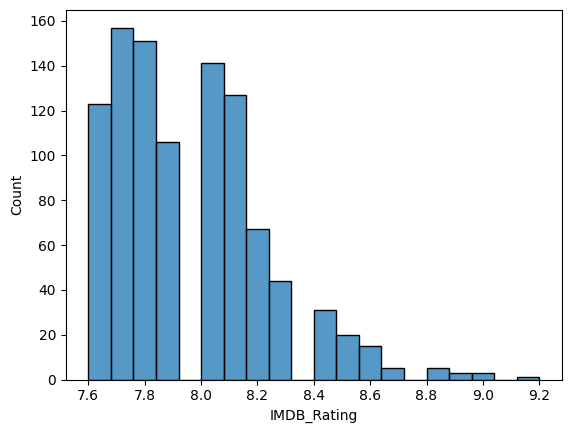

In [26]:
ax = sns.histplot(data = df, x='IMDB_Rating')


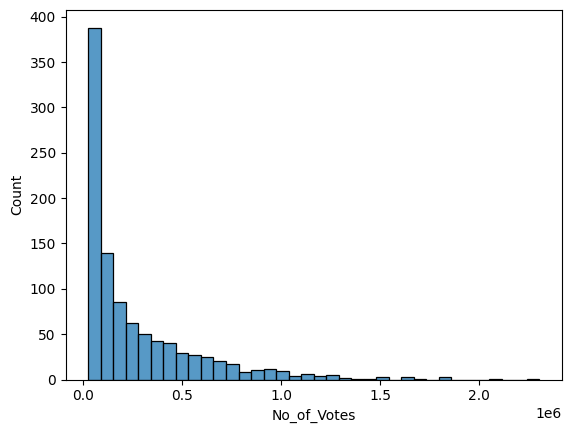

In [27]:
ax = sns.histplot(data = df, x='No_of_Votes')


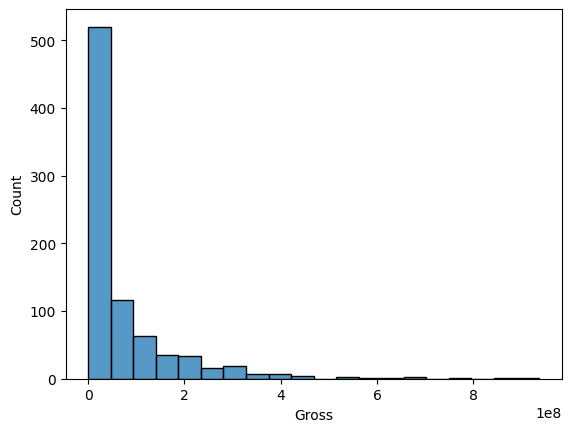

In [28]:
ax = sns.histplot(data = df, x='Gross', bins = 20)


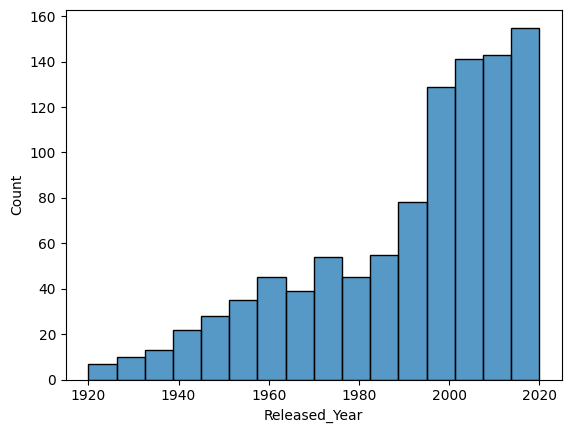

In [29]:
ax = sns.histplot(data = df, x='Released_Year')


In [31]:
df.groupby('Released_Year')[['Series_Title']].count()\
  .sort_values('Series_Title',ascending=False)\
  .head(10)

,Series_Title
Released_Year,
2014,32
2004,31
2009,29
2013,28
2016,28
2001,27
2007,26
2006,26
2015,25


In [32]:
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

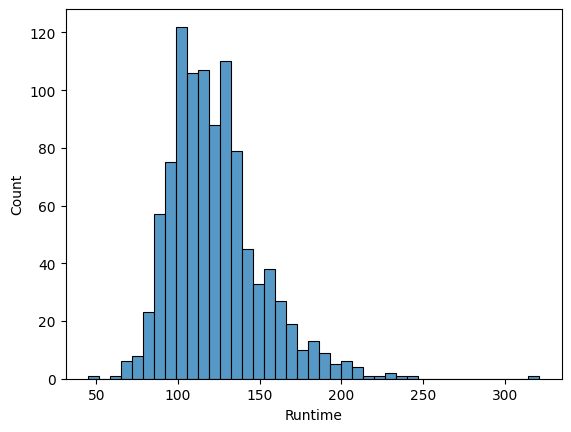

In [33]:
ax = sns.histplot(data = df, x='Runtime')


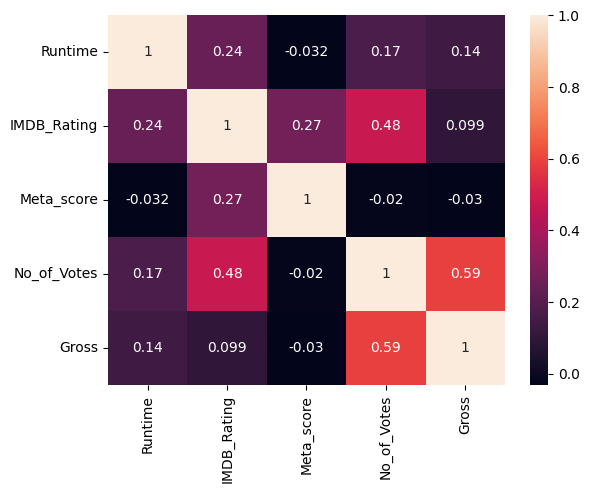

In [34]:
ax = sns.heatmap(df[['Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']].corr(), annot= True)

In [35]:
df.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00


In [36]:
df.groupby('Director').agg(
            quantidade_filmes = ('Series_Title', 'count'), 
            media_gross=('Gross', 'mean'))\
  .sort_values('media_gross',ascending=False)\
  .head(20)

,quantidade_filmes,media_gross
Director,,
Anthony Russo,4,551259850.75
Gareth Edwards,1,532177324.00
J.J. Abrams,3,474390301.67
Josh Cooley,1,434038008.00
Roger Allers,1,422783777.00
Tim Miller,1,363070709.00
James Gunn,2,361494850.50
James Cameron,5,349647320.40
Byron Howard,1,341268248.00


In [37]:
col = ['Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']
metrica = ['mean','max','min','sum','count']


In [38]:
@interact(metrica = metrica ,col = col)
def funcao(metrica,col):
    return df.dropna().groupby('Released_Year').agg(metrica = (col, metrica)).sort_values('metrica',ascending=False).rename({'metrica':f'{metrica}'}, axis = 1).head(20)

    


interactive(children=(Dropdown(description='metrica', options=('mean', 'max', 'min', 'sum', 'count'), value='m…